In [983]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "overfit"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [984]:
import pandas as pd

def load_data(data_path = "datasets"):
    csv_path_train = os.path.join(data_path, "train.csv")
    csv_path_test = os.path.join(data_path, "test.csv")
    csv_path_sample_submission = os.path.join(data_path, "sample_submission.csv")
    return pd.read_csv(csv_path_train), pd.read_csv(csv_path_test), pd.read_csv(csv_path_sample_submission)

In [985]:
train_data, test_data, sample_submission_data = load_data()

In [230]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19750 entries, 0 to 19749
Columns: 301 entries, id to 299
dtypes: float64(300), int64(1)
memory usage: 45.4 MB


In [231]:
train_data[:3]

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211


In [232]:
test_data[:3]

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463


In [7]:
train_data.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


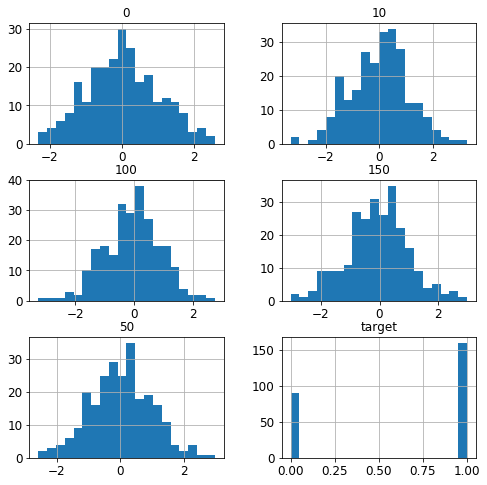

In [8]:
train_data[["target","0","10","50","100","150"]].hist(bins=20,figsize=(8,8))
plt.show()

In [9]:
corr_matrix = train_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
33        0.373608
65        0.293846
24        0.173096
183       0.164146
199       0.159442
201       0.142238
30        0.132705
289       0.127213
114       0.124792
164       0.124151
101       0.118379
272       0.113909
226       0.113660
17        0.110998
105       0.110589
0         0.108966
244       0.108147
13        0.107828
176       0.099790
89        0.099526
214       0.097068
240       0.096668
119       0.092622
221       0.091455
215       0.090960
246       0.088314
285       0.087762
193       0.086302
253       0.084235
            ...   
4        -0.114726
276      -0.117467
239      -0.118166
43       -0.121413
252      -0.122335
209      -0.127391
63       -0.127440
82       -0.128248
150      -0.130454
237      -0.133168
134      -0.133731
220      -0.134738
298      -0.134760
90       -0.136230
230      -0.136263
258      -0.138332
133      -0.139100
129      -0.139439
165      -0.142526
39       -0.142915
16       -0.144267
194      -0.

## Prepare the data

In [986]:
def drop_features(X, feature_list):
        X_drop = X.drop(feature_list, axis =1)
        return X_drop

In [987]:
train_set = drop_features(train_data, ["id","target"])
target_set = train_data["target"]
test_set = drop_features(test_data, ["id"])
train_set[:3]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211


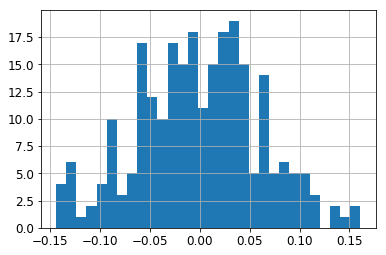

In [12]:
(train_set.mean(axis = 1)).hist(bins=30)

In [988]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


prepare_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

X_train = prepare_pipeline.fit_transform(train_set)
y_train = np.array(train_data["target"])
X_test = prepare_pipeline.fit_transform(test_set)

In [382]:
X_train[:3,:5]

array([[-0.12173567,  2.17600225,  0.5036917 , -0.60997161,  1.26523203],
       [ 1.06157697, -0.93927777, -0.53978988,  0.32097431, -0.41572855],
       [-0.54829027, -0.06167818, -0.50546483,  0.1446888 , -0.022827  ]])

In [15]:
y_train[:3]

array([1., 0., 1.])

In [383]:
print(X_train.shape, y_train.shape, X_test.shape)

(250, 300) (250,) (19750, 300)


## CV score evaluation

In [989]:
from sklearn.model_selection import cross_val_score

n_cv = 6

def CV_scores(clf, X, y, cv=n_cv):
    scores = cross_val_score(clf, X, y, cv=cv, scoring= 'accuracy')
    scores_mean = np.mean(scores)
    scores_dev = np.std(scores)
    return scores_mean, scores_dev

def CV_scores_auc(clf, X, y, cv=n_cv):
    scores = cross_val_score(clf, X, y, cv=cv, scoring= 'roc_auc')
    scores_mean = np.mean(scores)
    scores_dev = np.std(scores)
    return scores_mean, scores_dev

## Learning curves

In [1054]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(10, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

## Model selection

### SVM classifier

In [344]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

poly_kernel_svm_clf = SVC(kernel="poly", coef0 = 1, gamma="auto")

param_grid = [
    {'degree': [1,2,3,4], 'C': [0.1,10,100]},
]

grid_search_svm = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=5, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_svm.fit(X_train,y_train)
best_svm_clf = grid_search_svm.best_estimator_
best_svm_clf

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [353]:
scores_mean, scores_dev = CV_scores(best_svm_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_svm_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7179271708683473 
CV scores std dev:  0.05473091173078954
CV auc scores mean:     0.7527448397013615 
CV auc scores std dev:  0.06600165544696221


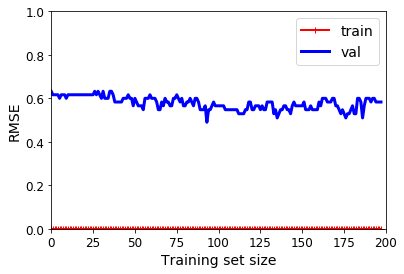

In [189]:
plot_learning_curves(best_svm_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

### DecisionTree

In [384]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [10,20], 'max_leaf_nodes': [10,20,50]},
]

grid_search_tree = GridSearchCV(tree_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_tree.fit(X_train,y_train)
best_tree_clf = grid_search_tree.best_estimator_
best_tree_clf

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [385]:
scores_mean, scores_dev = CV_scores(best_tree_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_tree_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6200154858691445 
CV scores std dev:  0.06034709784018812
CV auc scores mean:     0.5895932257043368 
CV auc scores std dev:  0.06766766852121478


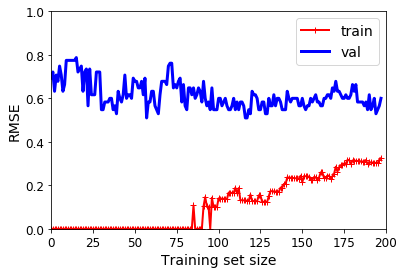

In [192]:
plot_learning_curves(best_tree_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

### RandomForest classifier

In [386]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50,100,200], 'max_features': [10,50,100]},
]

grid_search_forest = GridSearchCV(forest_clf, param_grid, cv=5, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_forest.fit(X_train,y_train)
best_forest_clf = grid_search_forest.best_estimator_
best_forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=100, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [387]:
scores_mean, scores_dev = CV_scores(best_forest_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_forest_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6519550909794812 
CV scores std dev:  0.03622512307071123
CV auc scores mean:     0.7440408357075023 
CV auc scores std dev:  0.039449419777733405


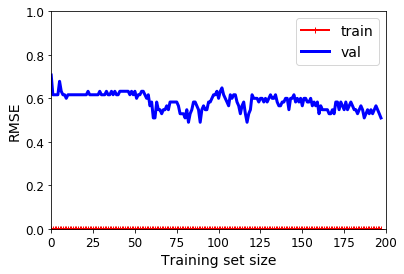

In [195]:
plot_learning_curves(best_forest_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

So far: massive overfit !!!

### SVM with RBF

In [388]:
from sklearn.svm import SVC

rbf_clf = SVC(kernel="rbf", gamma= 5, C=0.1)

In [389]:
scores_mean, scores_dev = CV_scores(rbf_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(rbf_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6399535423925669 
CV scores std dev:  0.004106311156716323
CV auc scores mean:     0.5 
CV auc scores std dev:  0.0


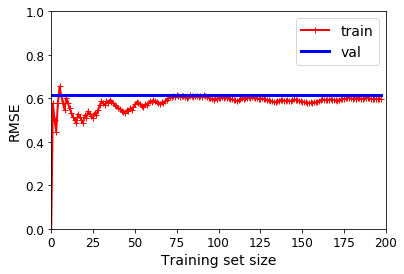

In [32]:
plot_learning_curves(rbf_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()   

Underfiting !

### Logistic Regression

In [1039]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', C=1)

In [1040]:
scores_mean, scores_dev = CV_scores(log_reg, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6803135888501742 
CV scores std dev:  0.05106898634000976
CV auc scores mean:     0.7694681861348528 
CV auc scores std dev:  0.0778297611821366


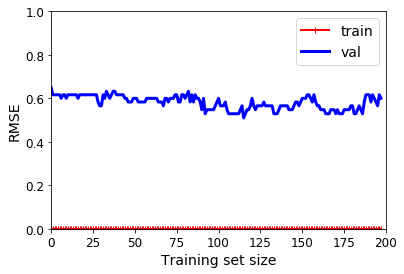

In [179]:
plot_learning_curves(log_reg, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

In [1159]:
log_reg_2 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

In [1160]:
scores_mean, scores_dev = CV_scores(log_reg_2, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_2, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7520325203252032 
CV scores std dev:  0.029301918261423605
CV auc scores mean:     0.8016619183285849 
CV auc scores std dev:  0.03891195699896827


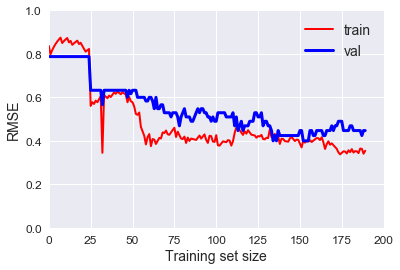

In [1062]:
plot_learning_curves(log_reg_2, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

In [1044]:
log_reg_4 = LogisticRegression(penalty='l1', C=0.12, solver='saga', warm_start=True)

scores_mean, scores_dev = CV_scores(log_reg_4, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_4, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7320944638017809 
CV scores std dev:  0.03696237646172995
CV auc scores mean:     0.8118708452041784 
CV auc scores std dev:  0.03769574386970627


In [1109]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

C = [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19]
penalty = ['l1', 'l2']
solver = ['liblinear','saga']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)

grid_search = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [1110]:
grid_search.best_params_

{'C': 0.09, 'penalty': 'l1', 'solver': 'liblinear'}

In [1113]:
grid_clf = grid_search.best_estimator_

scores_mean, scores_dev = CV_scores(grid_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(grid_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7560975609756097 
CV scores std dev:  0.04985970416734777
CV auc scores mean:     0.8015827793605571 
CV auc scores std dev:  0.03582180433103301


### Lasso with GridSearch

In [1175]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score, make_scorer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances



# some settings
rfe_min_features = 12
rfe_step = 15
rfe_cv = 5
sss_n_splits = 20
sss_test_size = 0.35
grid_search_cv = 20
noise_std = 0.01
r2_threshold = 0.21
random_seed = 213

# data
train_X = train_set.values
train_y = target_set
test = test_set.values

# scale using RobustScaler on train + test
data = RobustScaler().fit_transform(np.concatenate((train_X, test), axis=0))
train_X = data[:250]
test = data[250:]

# add a bit of noise to train_X to reduce overfitting
#train_X += np.random.normal(0, noise_std, train_X.shape)

# define roc_auc_metric robust to only one class in y_pred
def scoring_roc_auc(y, y_pred):
    try:
        return roc_auc_score(y, y_pred)
    except:
        return 0.5

robust_roc_auc = make_scorer(scoring_roc_auc)

# define model and its parameters
model = Lasso(alpha=0.031, tol=0.01, random_state=random_seed, selection='random')
#model = LogisticRegression(solver = 'liblinear')

param_grid = {
            'alpha' : [0.022, 0.021, 0.02, 0.019, 0.023, 0.024, 0.025, 0.026, 0.027, 0.029, 0.031],
            'tol'   : [0.0013, 0.0014, 0.001, 0.0015, 0.0011, 0.0012, 0.0016, 0.0017]
        }

feature_selector = RFECV(model, min_features_to_select=rfe_min_features, scoring=robust_roc_auc, 
                         step=rfe_step, verbose=0, cv=rfe_cv, n_jobs=-1)

print("counter | val_mse  |  val_mae  |  val_roc  |  val_cos  |  val_dist  |  val_r2    | feature_count ")
print("-------------------------------------------------------------------------------------------------")

predictions = pd.DataFrame()
counter = 0

# split training data to build one model on each traing-data-subset
for train_index, val_index in StratifiedShuffleSplit(n_splits=sss_n_splits, test_size=sss_test_size, 
                                                     random_state=random_seed).split(train_X, train_y):
    X, val_X = train_X[train_index], train_X[val_index]
    y, val_y = train_y[train_index], train_y[val_index]

    # get the best features for this data set
    feature_selector.fit(X, y)
    # remove irrelevant features from X, val_X and test
    X_important_features        = feature_selector.transform(X)
    val_X_important_features    = feature_selector.transform(val_X)
    test_important_features     = feature_selector.transform(test)

    # run grid search to find the best Lasso parameters for this subset of training data and subset of features 
    grid_search = GridSearchCV(feature_selector.estimator_, param_grid=param_grid, verbose=0, n_jobs=-1, 
                               scoring=robust_roc_auc, cv=20, iid=False)
    grid_search.fit(X_important_features, y)

    # score our fitted model on validation data
    val_y_pred = grid_search.best_estimator_.predict(val_X_important_features)
    val_mse = mean_squared_error(val_y, val_y_pred)
    val_mae = mean_absolute_error(val_y, val_y_pred)
    val_roc = roc_auc_score(val_y, val_y_pred)
    val_cos = cosine_similarity(val_y.values.reshape(1, -1), val_y_pred.reshape(1, -1))[0][0]
    val_dst = euclidean_distances(val_y.values.reshape(1, -1), val_y_pred.reshape(1, -1))[0][0]
    val_r2  = r2_score(val_y, val_y_pred)

    # if model did well on validation, save its prediction on test data, using only important features
    # r2_threshold (0.185) is a heuristic threshold for r2 error
    # you can use any other metric/metric combination that works for you
    if val_r2 > r2_threshold:
        message = '<-- OK'
        prediction = grid_search.best_estimator_.predict(test_important_features)
        predictions = pd.concat([predictions, pd.DataFrame(prediction)], axis=1)
    else:
        message = '<-- skipping'


    print("{0:2}      | {1:.4f}   |  {2:.4f}   |  {3:.4f}   |  {4:.4f}   |  {5:.4f}    |  {6:.4f}    |  {7:3}         {8}  ".format(counter, val_mse, val_mae, val_roc, val_cos, val_dst, val_r2, feature_selector.n_features_, message))
    
    counter += 1

print("-------------------------------------------------------------------------------------------------")
print("{}/{} models passed validation threshold and will be ensembled.".format(len(predictions.columns), sss_n_splits))


counter | val_mse  |  val_mae  |  val_roc  |  val_cos  |  val_dist  |  val_r2    | feature_count 
-------------------------------------------------------------------------------------------------
 0      | 0.2005   |  0.4012   |  0.7310   |  0.8301   |  4.2009    |  0.1334    |  255         <-- skipping  
 1      | 0.1868   |  0.3894   |  0.7584   |  0.8420   |  4.0540    |  0.1929    |   90         <-- skipping  
 2      | 0.2246   |  0.4078   |  0.6869   |  0.8158   |  4.4462    |  0.0292    |   75         <-- skipping  
 3      | 0.1697   |  0.3715   |  0.8443   |  0.8564   |  3.8643    |  0.2667    |  180         <-- OK  
 4      | 0.2044   |  0.3874   |  0.7165   |  0.8269   |  4.2408    |  0.1169    |   15         <-- skipping  
 5      | 0.1752   |  0.3598   |  0.7974   |  0.8513   |  3.9268    |  0.2428    |   12         <-- OK  
 6      | 0.2102   |  0.3870   |  0.6881   |  0.8200   |  4.3011    |  0.0916    |  210         <-- skipping  
 7      | 0.1593   |  0.3583   |  0.856

In [1166]:
mean_pred = pd.DataFrame(predictions.mean(axis=1))
mean_pred.index += 250
mean_pred.columns = ['target']
mean_pred.to_csv('submission_mean_lasso.csv', index_label='id', index=True)  

Mean of (Lassos + best LogReg)

In [1162]:
log_reg_2 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
log_reg_2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [1176]:
predictions_tot = pd.concat([predictions, pd.DataFrame(log_reg_2.predict_proba(X_test)[:,1])], axis=1)
mean_pred_lasso_logreg = pd.DataFrame(predictions_tot.mean(axis=1))
mean_pred_lasso_logreg.index += 250
mean_pred_lasso_logreg.columns = ['target']
mean_pred_lasso_logreg.to_csv('submission_mean_lasso_logreg.csv', index_label='id', index=True)

In [1177]:
mean_pred_lasso_logreg.head()

,target
250,0.708647
251,0.654836
252,0.647880
253,0.827480
254,0.511009


Mean( (Mean Lassos) + best LogReg )

In [1142]:
pred_meanlasso = predictions.mean(axis=1)
pred_meanlasso_logreg = pd.concat([pred_meanlasso, pd.DataFrame(log_reg_2.predict_proba(X_test)[:,1])], axis=1)
mean_pred = pd.DataFrame(pred_meanlasso_logreg.mean(axis=1))
mean_pred.index += 250
mean_pred.columns = ['target']
mean_pred.to_csv('submission_mean_lasso_logreg_2.csv', index_label='id', index=True)

In [1143]:
mean_pred.head()

,target
250,0.718661
251,0.609425
252,0.610963
253,0.836798
254,0.525313


### ExtraTrees

In [395]:
from sklearn.ensemble import ExtraTreesClassifier

forest_clf = ExtraTreesClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [5,10], 'max_depth': [5,10,20], 'max_leaf_nodes': [10,20,50]},
]

grid_search_extra_forest = GridSearchCV(forest_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_extra_forest.fit(X_train,y_train)
extra_trees_clf = grid_search_extra_forest.best_estimator_
extra_trees_clf

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=5, max_features='auto', max_leaf_nodes=10,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [396]:
scores_mean, scores_dev = CV_scores(extra_trees_clf, X_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(extra_trees_clf, X_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6357917150600078 
CV scores std dev:  0.02446942667822949
CV auc scores mean:     0.6234647040202596 
CV auc scores std dev:  0.040366854450150744


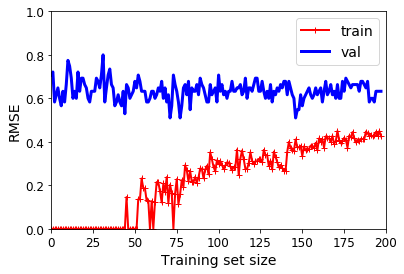

In [397]:
plot_learning_curves(extra_trees_clf, X_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

## Selecting features

Ordering features by squared correlation with target (to eliminate sign)

In [994]:
corr_matrix = train_data.drop("id", axis=1).corr()
corr_with_target = corr_matrix["target"]
corr_with_target_squared = np.power(corr_with_target, 2)
corr_with_target_squared = corr_with_target_squared.sort_values(ascending=False)
corr_with_target_squared.head()

target    1.000000
33        0.139583
65        0.086346
217       0.042938
117       0.039005
Name: target, dtype: float64

In [995]:
list_features = corr_with_target_squared.keys()[1:]

In [996]:
list_features

Index(['33', '65', '217', '117', '91', '24', '295', '73', '183', '80',
       ...
       '40', '191', '207', '136', '74', '20', '224', '172', '195', '75'],
      dtype='object', length=300)

In [997]:
n_features = 3
train_set_reduced = train_set[list_features[:n_features]]
test_set_reduced = test_set[list_features[:n_features]]

In [998]:
train_set_reduced.head()

,33,65,217
0,0.385,-0.770,1.187
1,-2.721,1.221,0.216
2,0.924,0.943,0.269
3,0.394,-0.706,0.066
4,0.037,0.357,0.110


In [999]:
test_set_reduced.head()

,33,65,217
0,1.988,-1.010,-0.904
1,0.543,-0.781,0.953
2,-1.191,-0.529,-1.201
3,0.542,0.754,1.502
4,0.635,-1.210,0.460


In [1000]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


prepare_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

X_train_red = prepare_pipeline.fit_transform(train_set_reduced)
y_train = np.array(train_data["target"])
X_test_red = prepare_pipeline.fit_transform(test_set_reduced)

In [1001]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,5,8], 'max_depth': [10,20], 'max_leaf_nodes': [10,20,50]},
]

grid_search_forest_2 = GridSearchCV(forest_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_forest_2.fit(X_train_red,y_train)
best_forest_clf_2 = grid_search_forest_2.best_estimator_
best_forest_clf_2

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [1002]:
scores_mean, scores_dev = CV_scores(best_forest_clf_2, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_forest_clf_2, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.708091366627952 
CV scores std dev:  0.024614282384408454
CV auc scores mean:     0.7311174422285532 
CV auc scores std dev:  0.028632933601372184


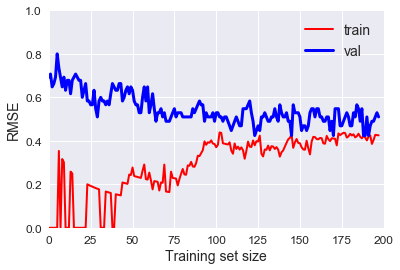

In [1003]:
plot_learning_curves(best_forest_clf_2, X_train_red, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

In [991]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

poly_kernel_svm_clf = SVC(kernel="poly", coef0 = 1)

param_grid = [
    {'degree': [1,2,3], 'C': [0.1,1,10], 'gamma': [0.03,0.1,0.3]},
]

grid_search_svm_2 = GridSearchCV(poly_kernel_svm_clf, param_grid, cv=4, 
                                  scoring = "neg_mean_squared_error", return_train_score = True)
grid_search_svm_2.fit(X_train_red,y_train)
best_svm_clf_2 = grid_search_svm_2.best_estimator_
best_svm_clf_2

/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=1, gamma=0.03, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [992]:
scores_mean, scores_dev = CV_scores(best_svm_clf_2, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_svm_clf_2, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.7002516453735965 
CV scores std dev:  0.045985083247170745
CV auc scores mean:     0.7383032605254828 
CV auc scores std dev:  0.08500817229012116


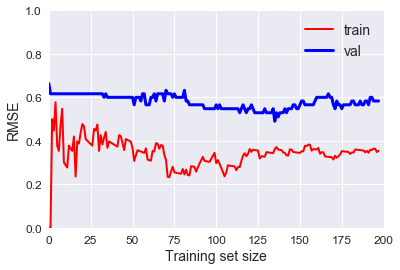

In [993]:
plot_learning_curves(best_svm_clf_2, X_train_red, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

### Sequential feature selection

In [1076]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [1077]:
log_reg_clf = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')

sfs1 = SFS(log_reg_clf, k_features=(10,20), forward=True, floating=False, verbose=0, 
           scoring='roc_auc', cv=6, n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

In [1078]:
top_features = list(sfs1.k_feature_names_)
top_features

['8',
 '16',
 '33',
 '39',
 '65',
 '69',
 '73',
 '82',
 '91',
 '108',
 '117',
 '189',
 '199',
 '217',
 '229',
 '249',
 '258',
 '295']

In [1079]:
X_train_sfs = prepare_pipeline.fit_transform(train_set[top_features])

In [1080]:
scores_mean, scores_dev = CV_scores(log_reg_clf, X_train_sfs, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_clf, X_train_sfs, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.8240418118466898 
CV scores std dev:  0.03537311588724473
CV auc scores mean:     0.9363880974992087 
CV auc scores std dev:  0.029617574549180677


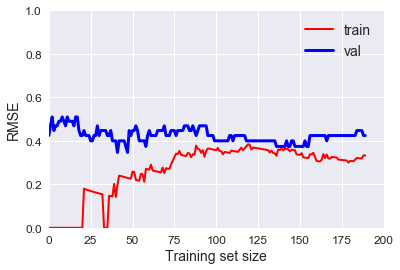

In [1081]:
plot_learning_curves(log_reg_clf, X_train_sfs, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

In [1083]:
log_reg_clf.fit(X_train_sfs,y_train)

X_test_sfs = prepare_pipeline.fit_transform(test_set[top_features])
y_pred_sfs = log_reg_clf.predict_proba(X_test_sfs)
df_pred_sfs = pd.DataFrame({'id': ids, 'target': y_pred_sfs[:,1]})  
df_pred_sfs[['id', 'target']].to_csv('submission_sfs.csv', index=False) 

## Dimensionnality reduction

In [311]:
from sklearn.decomposition import PCA

In [418]:
pca = PCA()

pca.fit(X_train)
pca.explained_variance_ratio_[:10]

array([0.01415622, 0.01393714, 0.01348502, 0.01315009, 0.01307046,
       0.0126725 , 0.01243153, 0.01227743, 0.01211999, 0.01181826])

In [419]:
len(pca.explained_variance_ratio_)  # the number of components is capped by the number of training instances.

250

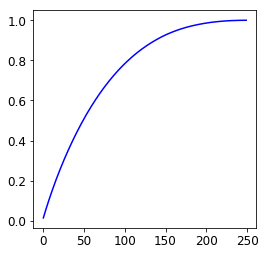

In [420]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (4,4))
plt.plot(range(len(cum_sum)), cum_sum, "b-")
plt.show()

In [421]:
pca = PCA(n_components = 0.9) # keeps 90 percent variance

X_train_red = pca.fit_transform(X_train)

In [422]:
X_train_red.shape

(250, 139)

In [425]:
scores_mean, scores_dev = CV_scores(best_tree_clf, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_tree_clf, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.5963995354239258 
CV scores std dev:  0.05809716837892613
CV auc scores mean:     0.5120528648306426 
CV auc scores std dev:  0.11695998312993561


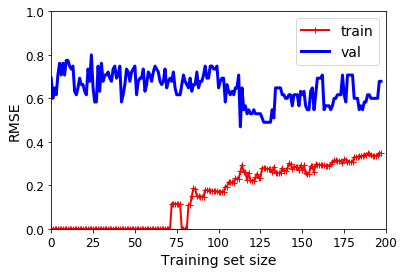

In [426]:
plot_learning_curves(best_tree_clf, X_train_red, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show() 

In [427]:
log_reg_3 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')

In [428]:
scores_mean, scores_dev = CV_scores(log_reg_3, X_train_red, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(log_reg_3, X_train_red, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6685056136275648 
CV scores std dev:  0.07135489424053444
CV auc scores mean:     0.7019468186134853 
CV auc scores std dev:  0.07234015278623121


In [429]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=20, n_neighbors=10)
X_lle_train = lle.fit_transform(X_train)

In [437]:
scores_mean, scores_dev = CV_scores(best_tree_clf, X_lle_train, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(best_tree_clf, X_lle_train, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.6637630662020906 
CV scores std dev:  0.05476244873525327
CV auc scores mean:     0.5864751503640393 
CV auc scores std dev:  0.0709445484330997


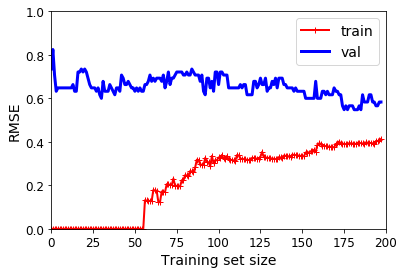

In [438]:
plot_learning_curves(best_tree_clf, X_lle_train, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

## Stacking models

In [326]:
# Define level 1 classifiers

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


RANDOM_SEED = 16

rf = RandomForestClassifier(n_estimators=500, random_state=RANDOM_SEED)
nb = GaussianNB()
svc = SVC(kernel='rbf', C=1.0, gamma='auto', probability=True)
knn = KNeighborsClassifier(n_neighbors=63)
sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001, alpha=0.01, l1_ratio=1.0, 
                    learning_rate='adaptive', loss='log', penalty='elasticnet')

In [327]:
# Define level 2 classifier and stacking

from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier

np.random.seed(RANDOM_SEED)
lr = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingCVClassifier(classifiers=[knn, rf, nb, sgd], 
                            use_probas=True,
                            use_features_in_secondary=True,
                            meta_classifier=lr,
                            cv=6)

In [329]:
# Set up K-Fold cross validation and predictions
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

num_folds = 6
folds = KFold(n_splits=num_folds, random_state=16)

test_result = np.zeros(len(test_set))
auc_score = 0
accur_score = 0

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_set, target_set)):
    print("Fold: ", fold_ + 1)
    
    X_train, y_train = train_set.iloc[trn_idx], target_set.iloc[trn_idx]
    X_valid, y_valid = train_set.iloc[val_idx], target_set.iloc[val_idx]
    
    sclf.fit(X_train.values, y_train.values)
    
    y_proba = sclf.predict_proba(X_valid)
    auc = roc_auc_score(y_valid, y_proba[:, 1])
    print(auc)
    auc_score += auc
    
    y_pred = (y_proba >= 0.5)*1
    accur = accuracy_score(y_valid, y_pred[:, 1])
    print(accur)
    accur_score += accur

    preds = sclf.predict_proba(test_set)
    test_result += preds[:, 1]

# print the average AUC and Accuracy across the folds and compute the final results on the test data
auc_score = auc_score / folds.n_splits
accur_score = accur_score / folds.n_splits
print("AUC score:      ", auc_score)
print("Accuracy score: ", accur_score)
test_result = test_result / folds.n_splits

Fold:  1
0.8775510204081634
0.6666666666666666
Fold:  2
0.7176470588235295
0.6904761904761905
Fold:  3
0.923469387755102
0.8095238095238095
Fold:  4
0.8245192307692308
0.7619047619047619
Fold:  5
0.8284313725490197
0.6829268292682927
Fold:  6
0.861244019138756
0.8048780487804879
AUC score:       0.8388103482406336
Accuracy score:  0.736062717770035


In [332]:
y_pred_stacking = (test_result >= 0.5)*1

In [333]:
df_stacking = pd.DataFrame({'id': ids, 'target': y_pred_stacking})  

In [334]:
df_stacking[['id', 'target']].to_csv('submission_stacking.csv', index=False) 

### Another try: Stacking with SFS

In [1084]:
from mlxtend.classifier import StackingCVClassifier

sgd = SGDClassifier(eta0=1, max_iter=1000, tol=0.0001, alpha=0.01, l1_ratio=1.0, 
                    learning_rate='adaptive', loss='log', penalty='elasticnet')

lr = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingCVClassifier(classifiers=[log_reg_2, log_reg_4, log_reg_clf, sgd], 
                            use_probas=True,
                            use_features_in_secondary=True,
                            meta_classifier=lr,
                            cv=6)

In [1085]:
scores_mean, scores_dev = CV_scores(sclf, X_train_sfs, y_train)
print("CV scores mean:    ", scores_mean, "\nCV scores std dev: ", scores_dev)
scores_mean_auc, scores_dev_auc = CV_scores_auc(sclf, X_train_sfs, y_train)
print("CV auc scores mean:    ", scores_mean_auc, "\nCV auc scores std dev: ", scores_dev_auc)

CV scores mean:     0.791908633372048 
CV scores std dev:  0.05114917467474852
CV auc scores mean:     0.8901234567901234 
CV auc scores std dev:  0.04117379571576814


/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=6.
  % (min_groups, self.n_splits)), Warning)
/Users/Benjamin/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has 

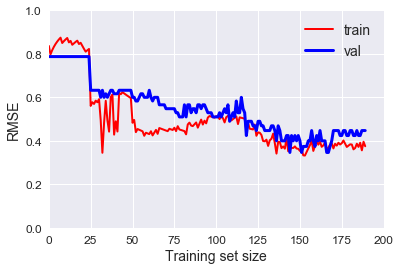

In [1055]:
plot_learning_curves(sclf, X_train_sfs, y_train)
plt.axis([0, 200, 0, 1])                     
plt.show()

In [1086]:
sclf.fit(X_train_sfs,y_train)

X_test_sfs = prepare_pipeline.fit_transform(test_set[top_features])
y_pred_sfs = sclf.predict_proba(X_test_sfs)
df_pred_sclf_sfs = pd.DataFrame({'id': ids, 'target': y_pred_sfs[:,1]})  
df_pred_sclf_sfs[['id', 'target']].to_csv('submission_sclf_sfs.csv', index=False) 

## Bayesian model

In [897]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [898]:
from sklearn.model_selection import train_test_split

np.random.seed(11)
perm = np.random.permutation(len(X_train))
X_tr, X_val, y_tr, y_val = train_test_split(X_train[perm], y_train[perm], test_size = 0.2)

In [899]:
print(X_tr.shape, y_tr.shape, X_val.shape, y_val.shape)

(200, 300) (200,) (50, 300) (50,)


In [900]:
n_tr, n_feat = X_tr.shape

In [901]:
def sigmoid(x):
    y = 1/(1 + np.exp(-x))
    return y

In [957]:
from sklearn.metrics import log_loss

def objective(W):
    """Objective function to minimize"""
    W_ar = np.array(W)
    v, w = (W_ar[:n_feat], W_ar[n_feat:2*n_feat])
    labels = ((v >= 0)*1).reshape(-1,)
    labels_fin = np.where(labels == 1)[0]
    X_red = X_tr[:,labels_fin]
    w_red = w[labels_fin]
    #w_true, b = (w[1:], w[0])
    y = sigmoid(np.matmul(X_red, w_red))
    loss = np.mean(log_loss(y_tr,y))
    return loss

In [958]:
W0 = np.random.uniform(-1, 1, 2*n_feat)
print(W0[:5])
objective(W0)

[-0.43124651  0.61541742 -0.67617133 -0.44667059 -0.8425169 ]


2.9087045397347544

In [977]:
from hyperopt import hp

# Create the domain space

#space = [hp.normal('bias', mu=0, sigma = 3)] + [hp.normal(str(dim), mu=0, sigma=0.3) for dim in range(n_feat)]

space = [hp.normal(str(dim), mu=0, sigma=0.3) for dim in range(2*n_feat)]

In [978]:
from hyperopt.pyll.stochastic import sample

sample(space)[:5]

(0.18023274256447053,
 -0.386483753076257,
 0.6738044150684281,
 -0.14485448033514756,
 -0.00834497653440984)

In [979]:
from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

from hyperopt import fmin

# Run max_evals evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=200, rstate= np.random.RandomState(50))

# Run max_evals evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

  0%|          | 0/200 [00:00<?, ?it/s, best loss: ?]

INFO:hyperopt.tpe:tpe_transform took 0.175304 seconds
INFO:hyperopt.tpe:TPE using 0 trials


  0%|          | 1/200 [00:00<00:53,  3.69it/s, best loss: 1.789812246273048]

INFO:hyperopt.tpe:tpe_transform took 0.164762 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 1.789812


  1%|          | 2/200 [00:00<00:54,  3.65it/s, best loss: 1.5028999124045357]

INFO:hyperopt.tpe:tpe_transform took 0.181243 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 1.502900


  2%|▏         | 3/200 [00:00<00:55,  3.56it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.195594 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 1.437135


  2%|▏         | 4/200 [00:01<00:57,  3.42it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.189765 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 1.437135


  2%|▎         | 5/200 [00:01<00:57,  3.42it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.372464 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 1.437135


  3%|▎         | 6/200 [00:01<01:10,  2.74it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.286036 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 1.437135


  4%|▎         | 7/200 [00:02<01:12,  2.66it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.361279 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 1.437135


  4%|▍         | 8/200 [00:02<01:18,  2.44it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.367293 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 1.437135


  4%|▍         | 9/200 [00:03<01:21,  2.34it/s, best loss: 1.4371350295007395]

INFO:hyperopt.tpe:tpe_transform took 0.184144 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 1.437135


  5%|▌         | 10/200 [00:03<01:14,  2.56it/s, best loss: 1.323912330304576]

INFO:hyperopt.tpe:tpe_transform took 0.356913 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss 1.323912


  6%|▌         | 11/200 [00:04<01:18,  2.41it/s, best loss: 1.323912330304576]

INFO:hyperopt.tpe:tpe_transform took 0.356987 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss 1.323912


  6%|▌         | 12/200 [00:04<01:20,  2.34it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.184915 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss 1.281169


  6%|▋         | 13/200 [00:04<01:13,  2.55it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.426220 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss 1.281169


  7%|▋         | 14/200 [00:05<01:32,  2.01it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.202911 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss 1.281169


  8%|▊         | 15/200 [00:05<01:21,  2.26it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.356296 seconds
INFO:hyperopt.tpe:TPE using 15/15 trials with best loss 1.281169


  8%|▊         | 16/200 [00:06<01:21,  2.25it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.200695 seconds
INFO:hyperopt.tpe:TPE using 16/16 trials with best loss 1.281169


  8%|▊         | 17/200 [00:06<01:22,  2.21it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.225058 seconds
INFO:hyperopt.tpe:TPE using 17/17 trials with best loss 1.281169


  9%|▉         | 18/200 [00:07<01:16,  2.38it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.363218 seconds
INFO:hyperopt.tpe:TPE using 18/18 trials with best loss 1.281169


 10%|▉         | 19/200 [00:07<01:20,  2.25it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.208761 seconds
INFO:hyperopt.tpe:TPE using 19/19 trials with best loss 1.281169


 10%|█         | 20/200 [00:08<01:15,  2.38it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.747516 seconds
INFO:hyperopt.tpe:TPE using 20/20 trials with best loss 1.281169


 10%|█         | 21/200 [00:09<02:25,  1.23it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.424746 seconds
INFO:hyperopt.tpe:TPE using 21/21 trials with best loss 1.281169


 11%|█         | 22/200 [00:11<03:03,  1.03s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.266744 seconds
INFO:hyperopt.tpe:TPE using 22/22 trials with best loss 1.281169


 12%|█▏        | 23/200 [00:12<03:11,  1.08s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.533995 seconds
INFO:hyperopt.tpe:TPE using 23/23 trials with best loss 1.281169


 12%|█▏        | 24/200 [00:14<03:33,  1.21s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.569470 seconds
INFO:hyperopt.tpe:TPE using 24/24 trials with best loss 1.281169


 12%|█▎        | 25/200 [00:15<03:54,  1.34s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.248492 seconds
INFO:hyperopt.tpe:TPE using 25/25 trials with best loss 1.281169


 13%|█▎        | 26/200 [00:17<04:04,  1.41s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.244097 seconds
INFO:hyperopt.tpe:TPE using 26/26 trials with best loss 1.281169


 14%|█▎        | 27/200 [00:18<03:52,  1.34s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.626216 seconds
INFO:hyperopt.tpe:TPE using 27/27 trials with best loss 1.281169


 14%|█▍        | 28/200 [00:19<03:58,  1.39s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.239773 seconds
INFO:hyperopt.tpe:TPE using 28/28 trials with best loss 1.281169


 14%|█▍        | 29/200 [00:21<04:12,  1.48s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.312886 seconds
INFO:hyperopt.tpe:TPE using 29/29 trials with best loss 1.281169


 15%|█▌        | 30/200 [00:23<04:06,  1.45s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.551792 seconds
INFO:hyperopt.tpe:TPE using 30/30 trials with best loss 1.281169


 16%|█▌        | 31/200 [00:24<04:08,  1.47s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.229730 seconds
INFO:hyperopt.tpe:TPE using 31/31 trials with best loss 1.281169


 16%|█▌        | 32/200 [00:25<04:00,  1.43s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.152884 seconds
INFO:hyperopt.tpe:TPE using 32/32 trials with best loss 1.281169


 16%|█▋        | 33/200 [00:26<03:26,  1.24s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.349889 seconds
INFO:hyperopt.tpe:TPE using 33/33 trials with best loss 1.281169


 17%|█▋        | 34/200 [00:27<03:13,  1.17s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.173637 seconds
INFO:hyperopt.tpe:TPE using 34/34 trials with best loss 1.281169


 18%|█▊        | 35/200 [00:28<03:06,  1.13s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.153369 seconds
INFO:hyperopt.tpe:TPE using 35/35 trials with best loss 1.281169


 18%|█▊        | 36/200 [00:29<02:48,  1.03s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.353553 seconds
INFO:hyperopt.tpe:TPE using 36/36 trials with best loss 1.281169


 18%|█▊        | 37/200 [00:30<02:47,  1.03s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.354143 seconds
INFO:hyperopt.tpe:TPE using 37/37 trials with best loss 1.281169


 19%|█▉        | 38/200 [00:31<02:45,  1.02s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.178924 seconds
INFO:hyperopt.tpe:TPE using 38/38 trials with best loss 1.281169


 20%|█▉        | 39/200 [00:32<02:36,  1.03it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.333755 seconds
INFO:hyperopt.tpe:TPE using 39/39 trials with best loss 1.281169


 20%|██        | 40/200 [00:33<02:35,  1.03it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.349119 seconds
INFO:hyperopt.tpe:TPE using 40/40 trials with best loss 1.281169


 20%|██        | 41/200 [00:34<02:36,  1.02it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.174455 seconds
INFO:hyperopt.tpe:TPE using 41/41 trials with best loss 1.281169


 21%|██        | 42/200 [00:35<02:28,  1.07it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.328826 seconds
INFO:hyperopt.tpe:TPE using 42/42 trials with best loss 1.281169


 22%|██▏       | 43/200 [00:36<02:29,  1.05it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.347709 seconds
INFO:hyperopt.tpe:TPE using 43/43 trials with best loss 1.281169


 22%|██▏       | 44/200 [00:37<02:31,  1.03it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.170505 seconds
INFO:hyperopt.tpe:TPE using 44/44 trials with best loss 1.281169


 22%|██▎       | 45/200 [00:38<03:00,  1.17s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.263681 seconds
INFO:hyperopt.tpe:TPE using 45/45 trials with best loss 1.281169


 23%|██▎       | 46/200 [00:40<03:07,  1.22s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.609257 seconds
INFO:hyperopt.tpe:TPE using 46/46 trials with best loss 1.281169


 24%|██▎       | 47/200 [00:41<03:26,  1.35s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.223184 seconds
INFO:hyperopt.tpe:TPE using 47/47 trials with best loss 1.281169


 24%|██▍       | 48/200 [00:43<03:35,  1.42s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.217358 seconds
INFO:hyperopt.tpe:TPE using 48/48 trials with best loss 1.281169


 24%|██▍       | 49/200 [00:44<03:20,  1.32s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.332553 seconds
INFO:hyperopt.tpe:TPE using 49/49 trials with best loss 1.281169


 25%|██▌       | 50/200 [00:45<03:05,  1.23s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.166951 seconds
INFO:hyperopt.tpe:TPE using 50/50 trials with best loss 1.281169


 26%|██▌       | 51/200 [00:46<02:56,  1.18s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.153301 seconds
INFO:hyperopt.tpe:TPE using 51/51 trials with best loss 1.281169


 26%|██▌       | 52/200 [00:47<02:39,  1.08s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.342577 seconds
INFO:hyperopt.tpe:TPE using 52/52 trials with best loss 1.281169


 26%|██▋       | 53/200 [00:48<02:35,  1.06s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.171277 seconds
INFO:hyperopt.tpe:TPE using 53/53 trials with best loss 1.281169


 27%|██▋       | 54/200 [00:49<02:35,  1.06s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.152868 seconds
INFO:hyperopt.tpe:TPE using 54/54 trials with best loss 1.281169


 28%|██▊       | 55/200 [00:50<02:24,  1.00it/s, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.339800 seconds
INFO:hyperopt.tpe:TPE using 55/55 trials with best loss 1.281169


 28%|██▊       | 56/200 [00:51<02:28,  1.03s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.289947 seconds
INFO:hyperopt.tpe:TPE using 56/56 trials with best loss 1.281169


 28%|██▊       | 57/200 [00:52<02:42,  1.14s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.577146 seconds
INFO:hyperopt.tpe:TPE using 57/57 trials with best loss 1.281169


 29%|██▉       | 58/200 [00:54<02:59,  1.26s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.519243 seconds
INFO:hyperopt.tpe:TPE using 58/58 trials with best loss 1.281169


 30%|██▉       | 59/200 [00:55<03:07,  1.33s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.216486 seconds
INFO:hyperopt.tpe:TPE using 59/59 trials with best loss 1.281169


 30%|███       | 60/200 [00:56<02:52,  1.23s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.321986 seconds
INFO:hyperopt.tpe:TPE using 60/60 trials with best loss 1.281169


 30%|███       | 61/200 [00:57<02:41,  1.16s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.338674 seconds
INFO:hyperopt.tpe:TPE using 61/61 trials with best loss 1.281169


 31%|███       | 62/200 [00:59<03:01,  1.31s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.249653 seconds
INFO:hyperopt.tpe:TPE using 62/62 trials with best loss 1.281169


 32%|███▏      | 63/200 [01:01<03:08,  1.37s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.549991 seconds
INFO:hyperopt.tpe:TPE using 63/63 trials with best loss 1.281169


 32%|███▏      | 64/200 [01:02<03:16,  1.44s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.550899 seconds
INFO:hyperopt.tpe:TPE using 64/64 trials with best loss 1.281169


 32%|███▎      | 65/200 [01:04<03:10,  1.41s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.153042 seconds
INFO:hyperopt.tpe:TPE using 65/65 trials with best loss 1.281169


 33%|███▎      | 66/200 [01:04<02:47,  1.25s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.344459 seconds
INFO:hyperopt.tpe:TPE using 66/66 trials with best loss 1.281169


 34%|███▎      | 67/200 [01:06<02:41,  1.22s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.612972 seconds
INFO:hyperopt.tpe:TPE using 67/67 trials with best loss 1.281169


 34%|███▍      | 68/200 [01:07<03:00,  1.37s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.264025 seconds
INFO:hyperopt.tpe:TPE using 68/68 trials with best loss 1.281169


 34%|███▍      | 69/200 [01:09<02:59,  1.37s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.499205 seconds
INFO:hyperopt.tpe:TPE using 69/69 trials with best loss 1.281169


 35%|███▌      | 70/200 [01:10<03:03,  1.41s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.534799 seconds
INFO:hyperopt.tpe:TPE using 70/70 trials with best loss 1.281169


 36%|███▌      | 71/200 [01:12<03:03,  1.42s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.153971 seconds
INFO:hyperopt.tpe:TPE using 71/71 trials with best loss 1.281169


 36%|███▌      | 72/200 [01:12<02:41,  1.26s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.328405 seconds
INFO:hyperopt.tpe:TPE using 72/72 trials with best loss 1.281169


 36%|███▋      | 73/200 [01:14<02:33,  1.21s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.361513 seconds
INFO:hyperopt.tpe:TPE using 73/73 trials with best loss 1.281169


 37%|███▋      | 74/200 [01:15<02:28,  1.18s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.174098 seconds
INFO:hyperopt.tpe:TPE using 74/74 trials with best loss 1.281169


 38%|███▊      | 75/200 [01:16<02:17,  1.10s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.329920 seconds
INFO:hyperopt.tpe:TPE using 75/75 trials with best loss 1.281169


 38%|███▊      | 76/200 [01:17<02:15,  1.10s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.154239 seconds
INFO:hyperopt.tpe:TPE using 76/76 trials with best loss 1.281169


 38%|███▊      | 77/200 [01:18<02:14,  1.10s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.154508 seconds
INFO:hyperopt.tpe:TPE using 77/77 trials with best loss 1.281169


 39%|███▉      | 78/200 [01:19<02:06,  1.03s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.335522 seconds
INFO:hyperopt.tpe:TPE using 78/78 trials with best loss 1.281169


 40%|███▉      | 79/200 [01:20<02:06,  1.05s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.159489 seconds
INFO:hyperopt.tpe:TPE using 79/79 trials with best loss 1.281169


 40%|████      | 80/200 [01:21<02:16,  1.14s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.559687 seconds
INFO:hyperopt.tpe:TPE using 80/80 trials with best loss 1.281169


 40%|████      | 81/200 [01:23<02:34,  1.30s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.584942 seconds
INFO:hyperopt.tpe:TPE using 81/81 trials with best loss 1.281169


 41%|████      | 82/200 [01:24<02:48,  1.42s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.219669 seconds
INFO:hyperopt.tpe:TPE using 82/82 trials with best loss 1.281169


 42%|████▏     | 83/200 [01:26<02:43,  1.40s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.549889 seconds
INFO:hyperopt.tpe:TPE using 83/83 trials with best loss 1.281169


 42%|████▏     | 84/200 [01:27<02:43,  1.41s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.153445 seconds
INFO:hyperopt.tpe:TPE using 84/84 trials with best loss 1.281169


 42%|████▎     | 85/200 [01:28<02:30,  1.31s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.213985 seconds
INFO:hyperopt.tpe:TPE using 85/85 trials with best loss 1.281169


 43%|████▎     | 86/200 [01:30<02:33,  1.35s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.597797 seconds
INFO:hyperopt.tpe:TPE using 86/86 trials with best loss 1.281169


 44%|████▎     | 87/200 [01:32<02:46,  1.48s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.252043 seconds
INFO:hyperopt.tpe:TPE using 87/87 trials with best loss 1.281169


 44%|████▍     | 88/200 [01:33<02:43,  1.46s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.562114 seconds
INFO:hyperopt.tpe:TPE using 88/88 trials with best loss 1.281169


 44%|████▍     | 89/200 [01:35<02:53,  1.56s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.630121 seconds
INFO:hyperopt.tpe:TPE using 89/89 trials with best loss 1.281169


 45%|████▌     | 90/200 [01:36<02:57,  1.61s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.231570 seconds
INFO:hyperopt.tpe:TPE using 90/90 trials with best loss 1.281169


 46%|████▌     | 91/200 [01:38<02:49,  1.55s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.579780 seconds
INFO:hyperopt.tpe:TPE using 91/91 trials with best loss 1.281169


 46%|████▌     | 92/200 [01:40<02:55,  1.63s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.293178 seconds
INFO:hyperopt.tpe:TPE using 92/92 trials with best loss 1.281169


 46%|████▋     | 93/200 [01:41<02:51,  1.61s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.550503 seconds
INFO:hyperopt.tpe:TPE using 93/93 trials with best loss 1.281169


 47%|████▋     | 94/200 [01:43<02:58,  1.68s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.666870 seconds
INFO:hyperopt.tpe:TPE using 94/94 trials with best loss 1.281169


 48%|████▊     | 95/200 [01:45<03:08,  1.79s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.230871 seconds
INFO:hyperopt.tpe:TPE using 95/95 trials with best loss 1.281169


 48%|████▊     | 96/200 [01:47<02:57,  1.71s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.569774 seconds
INFO:hyperopt.tpe:TPE using 96/96 trials with best loss 1.281169


 48%|████▊     | 97/200 [01:48<02:56,  1.71s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.218860 seconds
INFO:hyperopt.tpe:TPE using 97/97 trials with best loss 1.281169


 49%|████▉     | 98/200 [01:50<02:56,  1.73s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.244405 seconds
INFO:hyperopt.tpe:TPE using 98/98 trials with best loss 1.281169


 50%|████▉     | 99/200 [01:52<02:45,  1.64s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.602503 seconds
INFO:hyperopt.tpe:TPE using 99/99 trials with best loss 1.281169


 50%|█████     | 100/200 [01:53<02:48,  1.68s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.239191 seconds
INFO:hyperopt.tpe:TPE using 100/100 trials with best loss 1.281169


 50%|█████     | 101/200 [01:55<02:40,  1.62s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.570733 seconds
INFO:hyperopt.tpe:TPE using 101/101 trials with best loss 1.281169


 51%|█████     | 102/200 [01:57<02:41,  1.65s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.233902 seconds
INFO:hyperopt.tpe:TPE using 102/102 trials with best loss 1.281169


 52%|█████▏    | 103/200 [01:58<02:33,  1.59s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.569186 seconds
INFO:hyperopt.tpe:TPE using 103/103 trials with best loss 1.281169


 52%|█████▏    | 104/200 [02:00<02:37,  1.64s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.585319 seconds
INFO:hyperopt.tpe:TPE using 104/104 trials with best loss 1.281169


 52%|█████▎    | 105/200 [02:02<02:39,  1.68s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.218764 seconds
INFO:hyperopt.tpe:TPE using 105/105 trials with best loss 1.281169


 53%|█████▎    | 106/200 [02:03<02:32,  1.62s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.600829 seconds
INFO:hyperopt.tpe:TPE using 106/106 trials with best loss 1.281169


 54%|█████▎    | 107/200 [02:05<02:36,  1.68s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.272921 seconds
INFO:hyperopt.tpe:TPE using 107/107 trials with best loss 1.281169


 54%|█████▍    | 108/200 [02:06<02:31,  1.65s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.543770 seconds
INFO:hyperopt.tpe:TPE using 108/108 trials with best loss 1.281169


 55%|█████▍    | 109/200 [02:08<02:36,  1.72s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.623606 seconds
INFO:hyperopt.tpe:TPE using 109/109 trials with best loss 1.281169


 55%|█████▌    | 110/200 [02:10<02:37,  1.75s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.229043 seconds
INFO:hyperopt.tpe:TPE using 110/110 trials with best loss 1.281169


 56%|█████▌    | 111/200 [02:12<02:27,  1.66s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.580880 seconds
INFO:hyperopt.tpe:TPE using 111/111 trials with best loss 1.281169


 56%|█████▌    | 112/200 [02:13<02:30,  1.71s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.233342 seconds
INFO:hyperopt.tpe:TPE using 112/112 trials with best loss 1.281169


 56%|█████▋    | 113/200 [02:15<02:22,  1.64s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.581910 seconds
INFO:hyperopt.tpe:TPE using 113/113 trials with best loss 1.281169


 57%|█████▋    | 114/200 [02:17<02:28,  1.73s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.278258 seconds
INFO:hyperopt.tpe:TPE using 114/114 trials with best loss 1.281169


 57%|█████▊    | 115/200 [02:18<02:21,  1.67s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.540379 seconds
INFO:hyperopt.tpe:TPE using 115/115 trials with best loss 1.281169


 58%|█████▊    | 116/200 [02:20<02:24,  1.72s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.580866 seconds
INFO:hyperopt.tpe:TPE using 116/116 trials with best loss 1.281169


 58%|█████▊    | 117/200 [02:22<02:23,  1.72s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.232078 seconds
INFO:hyperopt.tpe:TPE using 117/117 trials with best loss 1.281169


 59%|█████▉    | 118/200 [02:23<02:17,  1.68s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.577013 seconds
INFO:hyperopt.tpe:TPE using 118/118 trials with best loss 1.281169


 60%|█████▉    | 119/200 [02:25<02:20,  1.73s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.237749 seconds
INFO:hyperopt.tpe:TPE using 119/119 trials with best loss 1.281169


 60%|██████    | 120/200 [02:27<02:14,  1.68s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.584774 seconds
INFO:hyperopt.tpe:TPE using 120/120 trials with best loss 1.281169


 60%|██████    | 121/200 [02:29<02:17,  1.74s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.216235 seconds
INFO:hyperopt.tpe:TPE using 121/121 trials with best loss 1.281169


 61%|██████    | 122/200 [02:30<02:09,  1.66s/it, best loss: 1.2811692072379912]

INFO:hyperopt.tpe:tpe_transform took 0.619452 seconds
INFO:hyperopt.tpe:TPE using 122/122 trials with best loss 1.281169


 62%|██████▏   | 123/200 [02:32<02:14,  1.75s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.566344 seconds
INFO:hyperopt.tpe:TPE using 123/123 trials with best loss 1.250596


 62%|██████▏   | 124/200 [02:34<02:16,  1.80s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.248318 seconds
INFO:hyperopt.tpe:TPE using 124/124 trials with best loss 1.250596


 62%|██████▎   | 125/200 [02:36<02:12,  1.76s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.589345 seconds
INFO:hyperopt.tpe:TPE using 125/125 trials with best loss 1.250596


 63%|██████▎   | 126/200 [02:38<02:18,  1.87s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.267254 seconds
INFO:hyperopt.tpe:TPE using 126/126 trials with best loss 1.250596


 64%|██████▎   | 127/200 [02:39<02:09,  1.77s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.542301 seconds
INFO:hyperopt.tpe:TPE using 127/127 trials with best loss 1.250596


 64%|██████▍   | 128/200 [02:41<02:09,  1.80s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.297882 seconds
INFO:hyperopt.tpe:TPE using 128/128 trials with best loss 1.250596


 64%|██████▍   | 129/200 [02:44<02:19,  1.97s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.333177 seconds
INFO:hyperopt.tpe:TPE using 129/129 trials with best loss 1.250596


 65%|██████▌   | 130/200 [02:45<02:12,  1.90s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.639864 seconds
INFO:hyperopt.tpe:TPE using 130/130 trials with best loss 1.250596


 66%|██████▌   | 131/200 [02:47<02:13,  1.93s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.242078 seconds
INFO:hyperopt.tpe:TPE using 131/131 trials with best loss 1.250596


 66%|██████▌   | 132/200 [02:49<02:04,  1.83s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.618224 seconds
INFO:hyperopt.tpe:TPE using 132/132 trials with best loss 1.250596


 66%|██████▋   | 133/200 [02:51<02:06,  1.89s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.251270 seconds
INFO:hyperopt.tpe:TPE using 133/133 trials with best loss 1.250596


 67%|██████▋   | 134/200 [02:53<01:59,  1.82s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.622465 seconds
INFO:hyperopt.tpe:TPE using 134/134 trials with best loss 1.250596


 68%|██████▊   | 135/200 [02:55<02:01,  1.86s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.256085 seconds
INFO:hyperopt.tpe:TPE using 135/135 trials with best loss 1.250596


 68%|██████▊   | 136/200 [02:57<02:03,  1.92s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.234090 seconds
INFO:hyperopt.tpe:TPE using 136/136 trials with best loss 1.250596


 68%|██████▊   | 137/200 [02:58<01:57,  1.87s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.644003 seconds
INFO:hyperopt.tpe:TPE using 137/137 trials with best loss 1.250596


 69%|██████▉   | 138/200 [03:00<01:56,  1.89s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.217530 seconds
INFO:hyperopt.tpe:TPE using 138/138 trials with best loss 1.250596


 70%|██████▉   | 139/200 [03:02<01:49,  1.80s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.618328 seconds
INFO:hyperopt.tpe:TPE using 139/139 trials with best loss 1.250596


 70%|███████   | 140/200 [03:04<01:51,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.284064 seconds
INFO:hyperopt.tpe:TPE using 140/140 trials with best loss 1.250596


 70%|███████   | 141/200 [03:06<01:47,  1.82s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.540562 seconds
INFO:hyperopt.tpe:TPE using 141/141 trials with best loss 1.250596


 71%|███████   | 142/200 [03:08<01:49,  1.89s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.278492 seconds
INFO:hyperopt.tpe:TPE using 142/142 trials with best loss 1.250596


 72%|███████▏  | 143/200 [03:10<01:49,  1.92s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.267920 seconds
INFO:hyperopt.tpe:TPE using 143/143 trials with best loss 1.250596


 72%|███████▏  | 144/200 [03:11<01:43,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.617506 seconds
INFO:hyperopt.tpe:TPE using 144/144 trials with best loss 1.250596


 72%|███████▎  | 145/200 [03:13<01:43,  1.88s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.245346 seconds
INFO:hyperopt.tpe:TPE using 145/145 trials with best loss 1.250596


 73%|███████▎  | 146/200 [03:15<01:39,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.567630 seconds
INFO:hyperopt.tpe:TPE using 146/146 trials with best loss 1.250596


 74%|███████▎  | 147/200 [03:17<01:41,  1.91s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.240225 seconds
INFO:hyperopt.tpe:TPE using 147/147 trials with best loss 1.250596


 74%|███████▍  | 148/200 [03:19<01:36,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.649693 seconds
INFO:hyperopt.tpe:TPE using 148/148 trials with best loss 1.250596


 74%|███████▍  | 149/200 [03:21<01:38,  1.93s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.592090 seconds
INFO:hyperopt.tpe:TPE using 149/149 trials with best loss 1.250596


 75%|███████▌  | 150/200 [03:23<01:37,  1.94s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.233441 seconds
INFO:hyperopt.tpe:TPE using 150/150 trials with best loss 1.250596


 76%|███████▌  | 151/200 [03:25<01:32,  1.90s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.610893 seconds
INFO:hyperopt.tpe:TPE using 151/151 trials with best loss 1.250596


 76%|███████▌  | 152/200 [03:27<01:32,  1.93s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.255204 seconds
INFO:hyperopt.tpe:TPE using 152/152 trials with best loss 1.250596


 76%|███████▋  | 153/200 [03:29<01:27,  1.87s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.608719 seconds
INFO:hyperopt.tpe:TPE using 153/153 trials with best loss 1.250596


 77%|███████▋  | 154/200 [03:31<01:27,  1.90s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.217254 seconds
INFO:hyperopt.tpe:TPE using 154/154 trials with best loss 1.250596


 78%|███████▊  | 155/200 [03:32<01:21,  1.80s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.596439 seconds
INFO:hyperopt.tpe:TPE using 155/155 trials with best loss 1.250596


 78%|███████▊  | 156/200 [03:34<01:20,  1.83s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.283370 seconds
INFO:hyperopt.tpe:TPE using 156/156 trials with best loss 1.250596


 78%|███████▊  | 157/200 [03:36<01:18,  1.83s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.561760 seconds
INFO:hyperopt.tpe:TPE using 157/157 trials with best loss 1.250596


 79%|███████▉  | 158/200 [03:38<01:17,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.230555 seconds
INFO:hyperopt.tpe:TPE using 158/158 trials with best loss 1.250596


 80%|███████▉  | 159/200 [03:40<01:16,  1.88s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.239179 seconds
INFO:hyperopt.tpe:TPE using 159/159 trials with best loss 1.250596


 80%|████████  | 160/200 [03:41<01:12,  1.82s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.646359 seconds
INFO:hyperopt.tpe:TPE using 160/160 trials with best loss 1.250596


 80%|████████  | 161/200 [03:43<01:12,  1.87s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.251792 seconds
INFO:hyperopt.tpe:TPE using 161/161 trials with best loss 1.250596


 81%|████████  | 162/200 [03:45<01:08,  1.80s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.593323 seconds
INFO:hyperopt.tpe:TPE using 162/162 trials with best loss 1.250596


 82%|████████▏ | 163/200 [03:47<01:08,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.234834 seconds
INFO:hyperopt.tpe:TPE using 163/163 trials with best loss 1.250596


 82%|████████▏ | 164/200 [03:49<01:04,  1.79s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.564251 seconds
INFO:hyperopt.tpe:TPE using 164/164 trials with best loss 1.250596


 82%|████████▎ | 165/200 [03:50<01:03,  1.82s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.228615 seconds
INFO:hyperopt.tpe:TPE using 165/165 trials with best loss 1.250596


 83%|████████▎ | 166/200 [03:53<01:03,  1.88s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.230319 seconds
INFO:hyperopt.tpe:TPE using 166/166 trials with best loss 1.250596


 84%|████████▎ | 167/200 [03:54<00:59,  1.82s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.239344 seconds
INFO:hyperopt.tpe:TPE using 167/167 trials with best loss 1.250596


 84%|████████▍ | 168/200 [03:56<01:00,  1.88s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.251034 seconds
INFO:hyperopt.tpe:TPE using 168/168 trials with best loss 1.250596


 84%|████████▍ | 169/200 [03:58<00:55,  1.80s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.576467 seconds
INFO:hyperopt.tpe:TPE using 169/169 trials with best loss 1.250596


 85%|████████▌ | 170/200 [04:00<00:55,  1.85s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.244197 seconds
INFO:hyperopt.tpe:TPE using 170/170 trials with best loss 1.250596


 86%|████████▌ | 171/200 [04:02<00:53,  1.84s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.625898 seconds
INFO:hyperopt.tpe:TPE using 171/171 trials with best loss 1.250596


 86%|████████▌ | 172/200 [04:04<00:53,  1.90s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.234914 seconds
INFO:hyperopt.tpe:TPE using 172/172 trials with best loss 1.250596


 86%|████████▋ | 173/200 [04:05<00:49,  1.84s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.624479 seconds
INFO:hyperopt.tpe:TPE using 173/173 trials with best loss 1.250596


 87%|████████▋ | 174/200 [04:07<00:50,  1.93s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.251593 seconds
INFO:hyperopt.tpe:TPE using 174/174 trials with best loss 1.250596


 88%|████████▊ | 175/200 [04:09<00:46,  1.86s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.583906 seconds
INFO:hyperopt.tpe:TPE using 175/175 trials with best loss 1.250596


 88%|████████▊ | 176/200 [04:11<00:45,  1.90s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.235408 seconds
INFO:hyperopt.tpe:TPE using 176/176 trials with best loss 1.250596


 88%|████████▊ | 177/200 [04:13<00:41,  1.82s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.619454 seconds
INFO:hyperopt.tpe:TPE using 177/177 trials with best loss 1.250596


 89%|████████▉ | 178/200 [04:15<00:42,  1.94s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.253521 seconds
INFO:hyperopt.tpe:TPE using 178/178 trials with best loss 1.250596


 90%|████████▉ | 179/200 [04:17<00:41,  1.98s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.649195 seconds
INFO:hyperopt.tpe:TPE using 179/179 trials with best loss 1.250596


 90%|█████████ | 180/200 [04:19<00:40,  2.02s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.270269 seconds
INFO:hyperopt.tpe:TPE using 180/180 trials with best loss 1.250596


 90%|█████████ | 181/200 [04:21<00:37,  1.95s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.236762 seconds
INFO:hyperopt.tpe:TPE using 181/181 trials with best loss 1.250596


 91%|█████████ | 182/200 [04:22<00:31,  1.76s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.165378 seconds
INFO:hyperopt.tpe:TPE using 182/182 trials with best loss 1.250596


 92%|█████████▏| 183/200 [04:24<00:28,  1.67s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.157775 seconds
INFO:hyperopt.tpe:TPE using 183/183 trials with best loss 1.250596


 92%|█████████▏| 184/200 [04:26<00:28,  1.79s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.738379 seconds
INFO:hyperopt.tpe:TPE using 184/184 trials with best loss 1.250596


 92%|█████████▎| 185/200 [04:29<00:31,  2.11s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.273516 seconds
INFO:hyperopt.tpe:TPE using 185/185 trials with best loss 1.250596


 93%|█████████▎| 186/200 [04:31<00:30,  2.17s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 1.103731 seconds
INFO:hyperopt.tpe:TPE using 186/186 trials with best loss 1.250596


 94%|█████████▎| 187/200 [04:35<00:35,  2.73s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.324944 seconds
INFO:hyperopt.tpe:TPE using 187/187 trials with best loss 1.250596


 94%|█████████▍| 188/200 [04:38<00:33,  2.76s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.709324 seconds
INFO:hyperopt.tpe:TPE using 188/188 trials with best loss 1.250596


 94%|█████████▍| 189/200 [04:40<00:29,  2.67s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.209103 seconds
INFO:hyperopt.tpe:TPE using 189/189 trials with best loss 1.250596


 95%|█████████▌| 190/200 [04:42<00:23,  2.34s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.388728 seconds
INFO:hyperopt.tpe:TPE using 190/190 trials with best loss 1.250596


 96%|█████████▌| 191/200 [04:44<00:19,  2.22s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.297075 seconds
INFO:hyperopt.tpe:TPE using 191/191 trials with best loss 1.250596


 96%|█████████▌| 192/200 [04:45<00:16,  2.04s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.361087 seconds
INFO:hyperopt.tpe:TPE using 192/192 trials with best loss 1.250596


 96%|█████████▋| 193/200 [04:47<00:13,  1.90s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.161988 seconds
INFO:hyperopt.tpe:TPE using 193/193 trials with best loss 1.250596


 97%|█████████▋| 194/200 [04:49<00:11,  1.83s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.309538 seconds
INFO:hyperopt.tpe:TPE using 194/194 trials with best loss 1.250596


 98%|█████████▊| 195/200 [04:50<00:08,  1.73s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.187065 seconds
INFO:hyperopt.tpe:TPE using 195/195 trials with best loss 1.250596


 98%|█████████▊| 196/200 [04:52<00:06,  1.65s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.177894 seconds
INFO:hyperopt.tpe:TPE using 196/196 trials with best loss 1.250596


 98%|█████████▊| 197/200 [04:53<00:04,  1.54s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.404688 seconds
INFO:hyperopt.tpe:TPE using 197/197 trials with best loss 1.250596


 99%|█████████▉| 198/200 [04:54<00:03,  1.53s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.168213 seconds
INFO:hyperopt.tpe:TPE using 198/198 trials with best loss 1.250596


100%|█████████▉| 199/200 [04:56<00:01,  1.44s/it, best loss: 1.2505958626380087]

INFO:hyperopt.tpe:tpe_transform took 0.375377 seconds
INFO:hyperopt.tpe:TPE using 199/199 trials with best loss 1.250596


100%|██████████| 2000/2000 [03:04<00:00, 10.83it/s, best loss: 1.0682723223821022]


In [980]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['127'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['127'][0]))


Minimum loss attained with TPE:    1.2506
Minimum loss attained with random: 1.0683

Number of trials needed to attain minimum with TPE:    122
Number of trials needed to attain minimum with random: 69


In [981]:
tpe_results = pd.DataFrame.from_dict(tpe_best, orient='index')
rand_results = pd.DataFrame.from_dict(rand_best, orient='index')

w_pred_tpe = np.array(tpe_results)
w_pred_rand = np.array(rand_results)

In [911]:
def pred(w):
    w_true, b = (w[1:], w[0])
    y = sigmoid(np.matmul(X_val, w_true) + b)
    y_pred = (y >= 0.5)*1
    return y_pred

In [975]:
def pred_2(W):
    v, w = (W[:n_feat], W[n_feat:(2*n_feat)])
    labels = ((v >= 0)*1).reshape(-1,)
    labels_fin = np.where(labels == 1)[0]
    X_red = X_val[:,labels_fin]
    w_red = w[labels_fin]
    y = sigmoid(np.matmul(X_red, w_red))
    y_pred = (y >= 0.5)*1
    return y_pred

In [982]:
from sklearn.metrics import accuracy_score

y_pred_tpe = pred_2(w_pred_tpe)
y_pred_rand = pred_2(w_pred_rand)
print(accuracy_score(y_val,y_pred_tpe), accuracy_score(y_val,y_pred_rand))

0.6 0.46


## Predictions on test set

Best classifier so far: LogReg with l1 penalty

In [1063]:
log_reg_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
log_reg_l1.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [1064]:
ids = test_data['id']

In [1028]:
def prediction(clf):
    y_predict = clf.predict(X_test)
    df = pd.DataFrame({'id': ids, 'target': y_predict})     
    return df

In [1071]:
def predict_proba(clf):
    y_proba = clf.predict_proba(X_test)
    df = pd.DataFrame({'id': ids, 'target': y_proba[:,1]})     
    return df

In [1066]:
df_pred = prediction(log_reg_l1)

df_pred.head()

,id,target
0,250,1.0
1,251,1.0
2,252,1.0
3,253,1.0
4,254,1.0


In [250]:
df_pred[['id', 'target']].to_csv('submission.csv', index=False) 

In [439]:
log_reg_saga = LogisticRegression(penalty='l1', C=0.12, solver='saga', warm_start=True)
log_reg_saga.fit(X_train,y_train)

df_pred_saga = prediction(log_reg_saga)
df_pred_saga[['id', 'target']].to_csv('submission_saga.csv', index=False) 

In [1073]:
df_proba_log_reg_l1 = predict_proba(log_reg_l1)
df_proba.head()

,id,target
0,250,0.734584
1,251,0.593910
2,252,0.616450
3,253,0.805189
4,254,0.529846


In [1075]:
df_proba_log_reg_l1[['id', 'target']].to_csv('submission_proba_log_reg.csv', index=False) 

## Neural network with dropout

In [592]:
from sklearn.model_selection import train_test_split

np.random.seed(11)
perm = np.random.permutation(len(X_train))
X_tr, X_val, y_tr, y_val = train_test_split(X_train[perm], y_train[perm], test_size = 0.2)

In [475]:
import tensorflow as tf

In [477]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [489]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [893]:
reset_graph()

# Parameters/Variables/Placeholders

n_features = X_train.shape[1]
n_hidden1 = 200
#n_hidden2 = 100
n_outputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")


training = tf.placeholder_with_default(False, shape=(), name='training')

dropout_rate = 0.25  # == 1 - keep_prob
X_drop = tf.layers.dropout(X, dropout_rate, training=training)

In [894]:
# NN Model

from functools import partial

scale = 0.02

my_dense_layer = partial(
    tf.layers.dense, activation=tf.nn.relu,
    kernel_regularizer=tf.contrib.layers.l1_regularizer(scale))

with tf.name_scope("dnn"):
    hidden1 = my_dense_layer(X_drop, n_hidden1, activation=tf.nn.relu,
                              name="hidden1")
    hidden1_drop = tf.layers.dropout(hidden1, dropout_rate, training=training)
    
#    hidden2 = my_dense_layer(hidden1_drop, n_hidden2, activation=tf.nn.relu,
#                              name="hidden2")
#    hidden2_drop = tf.layers.dropout(hidden2, dropout_rate, training=training)
    
    logits = my_dense_layer(hidden1_drop, n_outputs, activation=None, name="outputs")

In [895]:
# Loss/Training/Evaluation

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    base_loss = tf.reduce_mean(xentropy, name="avg_xentropy") 
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss = tf.add_n([base_loss] + reg_losses, name="loss")

with tf.name_scope("train"):
    learning_rate = 0.01
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)    

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [896]:
n_epochs = 200
batch_size = 25

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_tr, y_tr, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})        
        if epoch % 10 == 0:
            accuracy_val = accuracy.eval(feed_dict={X: X_val, y: y_val})
            accuracy_train = accuracy.eval(feed_dict={X: X_tr, y: y_tr})
            print(epoch, "Train accuracy:", accuracy_train, "  Validation accuracy:", accuracy_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.94   Validation accuracy: 0.64
10 Train accuracy: 0.93   Validation accuracy: 0.66
20 Train accuracy: 0.955   Validation accuracy: 0.7
30 Train accuracy: 0.955   Validation accuracy: 0.7
40 Train accuracy: 0.955   Validation accuracy: 0.68
50 Train accuracy: 0.955   Validation accuracy: 0.72
60 Train accuracy: 0.955   Validation accuracy: 0.74
70 Train accuracy: 0.97   Validation accuracy: 0.72
80 Train accuracy: 0.98   Validation accuracy: 0.72
90 Train accuracy: 0.96   Validation accuracy: 0.66
100 Train accuracy: 0.955   Validation accuracy: 0.76
110 Train accuracy: 0.96   Validation accuracy: 0.7
120 Train accuracy: 0.955   Validation accuracy: 0.72
130 Train accuracy: 0.935   Validation accuracy: 0.68
140 Train accuracy: 0.96   Validation accuracy: 0.7
150 Train accuracy: 0.975   Validation accuracy: 0.72
160 Train accuracy: 0.96   Validation accuracy: 0.74
170 Train accuracy: 0.965   Validation accuracy: 0.7
180 Train accuracy: 0.96   Validation accuracy: 0.7


In [554]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    Z = logits.eval(feed_dict={X: X_test})
    y_pred_nn = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [557]:
df_nn = pd.DataFrame({'id': ids, 'target': y_pred_nn})
df_nn[['id', 'target']].to_csv('submission_nn.csv', index=False) 